# Matplotlib for diagrams

This is my first post for the Matplotlib blog so I wanted to lead with an example of what I most love about it: How much control Matplotlib gives you. I like to use it as a programmable drawing tool that happens to be good at plotting data.

The default plot layout for Matplotlib works great for a lot of things, but sometimes you want to exert
more control. Sometimes you want to treat your figure window as a blank canvas and create diagrams 
to communicate your ideas. Here, we will walk through the process for setting this up. Most of these tricks are detailed in [this cheat sheet for laying out plots](https://e2eml.school/matplotlib_framing.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The first step is to choose the size of your canvas.

(Just a heads up, I love the metaphor 
of the canvas, so that’s how I am using the term here. The Canvas object is a very specific 
thing in the Matplotlib code base. That's not what I'm referring to.)

I’m planning to make a diagram that is 16 centimeters wide and 9 centimeters high.
This will fit comfortably on a piece of A4 or US Letter paper
and will be almost twice as wide as it is high. It also scales up nicely to fit on a wide-format slide presentation.

The `figure` function accepts a `figsize` argument, a tuple of `(width, height)` in **inches**. To convert from centimeters, we'll just divide by 2.54.

In [2]:
fig_width = 16  # cm
fig_height = 9  # cm
fig = plt.figure(figsize=(fig_width / 2.54, fig_height / 2.54))

<Figure size 453.543x255.118 with 0 Axes>

The next step is to add an Axes object that we can draw on. By default, Matplotlib will size and place the Axes to leave a little border and room for x- and y-axis labels. However, we don't want that this time around. We want our Axes to extend right up to the edge of the Figure.

The `add_axes()` function lets us specify exactly where to place our new Axes and how big to make it. It accepts a tuple of the format `(left, bottom, width height)`. The coordinate frame of the Figure is always (0, 0) at the bottom left corner and (1, 1) at the upper right, no matter what size of Figure you are working with. Positions, widths, and heights all become fractions of the total width and height of the Figure.

To fill the Figure with our Axes entirely, we specify a left position of 0, a bottom position of 0, a width of 1, and a height of 1.


In [3]:
ax = fig.add_axes((0, 0, 1, 1))

To make our diagram creation easier, we can set the axis limits so that one unit in the figure equals one centimeter. This grants us an intuitive way to control the size of objects in the diagram. A circle with a radius of 2 will be drawn as a circle (not an ellipse) in the final image and have a radius of 2 cm.

In [4]:
ax.set_xlim(0, fig_width)
ax.set_ylim(0, fig_height)

(0, 9)

We can also do away with the automatically generated ticks and tick labels with this pair of calls.

In [5]:
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

At this point we have a big blank space of exactly the right size and shape. Now we can begin building our diagram. The foundation of the image will be the background color. White is fine, but sometimes it's fun to mix it up. [Here are some ideas](https://e2eml.school/matplotlib_lines.html#color) to get you started.

In [6]:
ax.set_facecolor("antiquewhite")

We can also add a border to the diagram to visually set it apart.

In [7]:
ax.spines["top"].set_color("midnightblue")
ax.spines["bottom"].set_color("midnightblue")
ax.spines["left"].set_color("midnightblue")
ax.spines["right"].set_color("midnightblue")
ax.spines["top"].set_linewidth(4)
ax.spines["bottom"].set_linewidth(4)
ax.spines["left"].set_linewidth(4)
ax.spines["right"].set_linewidth(4)

Now we have a foundation and background in place and we're finally ready to start drawing.
You have complete freedom to [draw curves and shapes](https://e2eml.school/matplotlib_lines.html),
[place points](https://e2eml.school/matplotlib_points.html),
and [add text](https://e2eml.school/matplotlib_text.html) of any variety within our
16 x 9 garden walls.

Then when you're done, the last step is to save the figure out as a `.png` file. In this format it can be imported to and added to whatever document or presentation you're working on 

In [8]:
fig.savefig("blank_diagram.png", dpi=300)

![Blank diagram example](blank_diagram.png)

If you're making a collection of diagrams, you can make a convenient template for your blank canvas.

In [9]:
def blank_diagram(fig_width=16, fig_height=9, bg_color="antiquewhite", color="midnightblue"):
    fig = plt.figure(figsize=(fig_width / 2.54, fig_height / 2.54))
    ax = fig.add_axes((0, 0, 1, 1))
    ax.set_xlim(0, fig_width)
    ax.set_ylim(0, fig_height)
    ax.set_facecolor(bg_color)
    
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    
    ax.spines["top"].set_color(color)
    ax.spines["bottom"].set_color(color)
    ax.spines["left"].set_color(color)
    ax.spines["right"].set_color(color)
    ax.spines["top"].set_linewidth(4)
    ax.spines["bottom"].set_linewidth(4)
    ax.spines["left"].set_linewidth(4)
    ax.spines["right"].set_linewidth(4)
    
    return fig, ax

Then you can take that canvas and add arbitrary text, shapes, and lines.

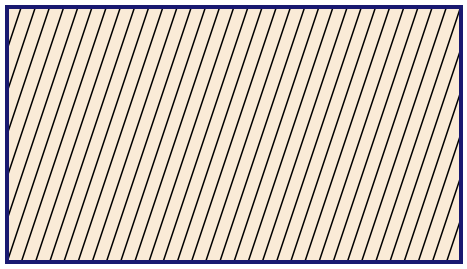

In [13]:
fig, ax = blank_diagram()

for x0 in np.arange(-3, 16, .5):
    ax.plot([x0, x0 + 3], [0, 9], color="black")

fig.savefig("stripes_diagram.png", dpi=300)

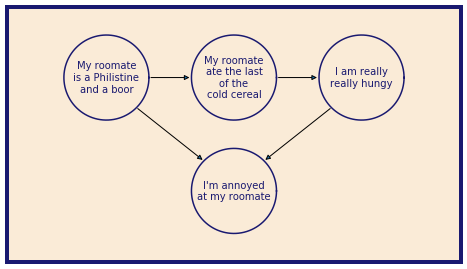

In [10]:
fig, ax = blank_diagram()

centers = [(3.5, 6.5), (8, 6.5), (12.5, 6.5), (8, 2.5)]
radii = 1.5
texts = [
    "\n".join(["My roomate", "is a Philistine", "and a boor"]),
    "\n".join(["My roomate", "ate the last", "of the", "cold cereal"]),
    "\n".join(["I am really", "really hungy"]),
    "\n".join(["I'm annoyed", "at my roomate"]),
]

# Draw circles with text in the center
for i, center in enumerate(centers):
    x, y = center
    theta = np.linspace(0, 2 * np.pi, 100)
    ax.plot(
        x + radii * np.cos(theta),
        y + radii * np.sin(theta),
        color="midnightblue",
    )
    ax.text(
        x, y,
        texts[i],
        horizontalalignment="center",
        verticalalignment="center",
        color="midnightblue",
    )

# Draw arrows connecting them
# https://e2eml.school/matplotlib_text.html#annotate
ax.annotate(
    "",
    (centers[1][0] - radii, centers[1][1]),
    (centers[0][0] + radii, centers[0][1]),
    arrowprops=dict(arrowstyle = "-|>"),
) 
ax.annotate(
    "",
    (centers[2][0] - radii, centers[2][1]),
    (centers[1][0] + radii, centers[1][1]),
    arrowprops=dict(arrowstyle = "-|>"),
)
ax.annotate(
    "",
    (centers[3][0] - .7 * radii, centers[3][1] + .7 * radii),
    (centers[0][0] + .7 * radii, centers[0][1] - .7 * radii),
    arrowprops=dict(arrowstyle = "-|>"),
)
ax.annotate(
    "",
    (centers[3][0] + .7 * radii, centers[3][1] + .7 * radii),
    (centers[2][0] - .7 * radii, centers[2][1] - .7 * radii),
    arrowprops=dict(arrowstyle = "-|>"),
)

fig.savefig("causal_diagram.png", dpi=300)

Once you get started on this path, you can start making extravagantly annotated plots. It can elevate your data presentations to true storytelling.

Happy diagram building!